In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#loindex_3_analysis_data.csv

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_pickle('EDA_data.pickle')

In [4]:
df2=pd.read_csv('prereq_edges.csv')

In [5]:
df.correctBinary.isna().sum()

567230

In [6]:
df.correctBinary.value_counts()

1    1708741
0     796133
Name: correctBinary, dtype: int64

In [7]:
df.correctBinary.value_counts(normalize=True)*100

1    68.216645
0    31.783355
Name: correctBinary, dtype: float64

In [8]:
atoms_only=df[~(df.correctBinary.isna())]

In [9]:
atoms_only.head()

graph_id                               user_id  \
0  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf  0012ff2b-871a-45d6-8e33-804f7464fa0a   
1  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf  0012ff2b-871a-45d6-8e33-804f7464fa0a   
3  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf  0012ff2b-871a-45d6-8e33-804f7464fa0a   
4  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf  0012ff2b-871a-45d6-8e33-804f7464fa0a   
5  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf  0012ff2b-871a-45d6-8e33-804f7464fa0a   

                                goal_id    interaction_end_time  \
0  e359efc4-ed49-4227-a03e-c0c9358487d3 2022-10-02 16:17:07.342   
1  e359efc4-ed49-4227-a03e-c0c9358487d3 2022-10-02 16:17:42.073   
3  4debeb6d-fc33-46ad-a19b-307c7ae270d0 2022-12-16 18:34:22.470   
4  4debeb6d-fc33-46ad-a19b-307c7ae270d0 2022-12-16 18:35:06.209   
5  4debeb6d-fc33-46ad-a19b-307c7ae270d0 2022-12-16 18:35:23.611   

                             learning_objective_name  \
0  Construct a truth table for a conditional stat...   
1  Construct a truth table for a conditional stat...   
3        Determine the sample space of an experiment   
4        Determine the sample space of an experiment   
5                Determine an event of an experiment   

                                atom_id correct  time_spent_answering_s  \
0  90bf68ef-fa40-4c57-9054-c417a848d897   False              396.441010   
1  49287c70-b63d-41be-9acc-24fd1f273158    True               26.042000   
3  1beef294-92f4-40f5-a340-b02f4cc9970c   False               87.829002   
4  f6486631-0b5e-4e95-a149-24418015abc2    True               42.161999   
5  4c7fdfc4-869c-464b-af26-42f7ffaba4c7    True               15.693000   

   time_spent_on_instruction_s  goal_progress  \
0                    24.492001       0.037663   
1                     8.122000       0.533186   
3                     3.608000       0.007354   
4                     1.341000       0.048507   
5                     1.489000       0.089903   

                          target_status_and_progress prev_concept_narrative  \
0  {'53568360-e9fe-465f-a8fc-1c75027cba94': {'pro...    DIRECT_CHOOSE_TOPIC   
1  {'53568360-e9fe-465f-a8fc-1c75027cba94': {'pro...  DIRECT_DIAGNOSE_TOPIC   
3  {'e5dfa5f5-7ded-4b39-911e-b2b1737007a1': {'pro...    DIRECT_CHOOSE_TOPIC   
4  {'e5dfa5f5-7ded-4b39-911e-b2b1737007a1': {'pro...  DIRECT_DIAGNOSE_TOPIC   
5  {'e5dfa5f5-7ded-4b39-911e-b2b1737007a1': {'pro...  DIRECT_DIAGNOSE_TOPIC   

   duration_s  is_target  loGraphID  difficulty  loIndex atom_type  \
0  420.933014       True        3.0    0.525000        0  question   
1   34.164001       True        3.0    0.547619        0  question   
3   91.437004       True        0.0    0.779141        1  question   
4   43.502998       True        0.0    0.546667        1  question   
5   17.181999       True        0.0    0.556164        2  question   

  correctBinary  
0             0  
1             1  
3             0  
4             1  
5             1

In [11]:
atoms_only.correctBinary=atoms_only.correctBinary.astype(int)

C:\Users\mpathirana\AppData\Local\Temp\ipykernel_25400\2192219686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atoms_only.correctBinary=atoms_only.correctBinary.astype(int)


In [12]:
atoms_only.pivot_table(index='correctBinary',aggfunc={'time_spent_answering_s':'mean','time_spent_on_instruction_s':'mean'})

time_spent_answering_s  time_spent_on_instruction_s
correctBinary                                                     
0                          135.559753                    33.649887
1                          107.550888                     9.864082

<AxesSubplot:xlabel='correctBinary', ylabel='time_spent_on_instruction_s'>

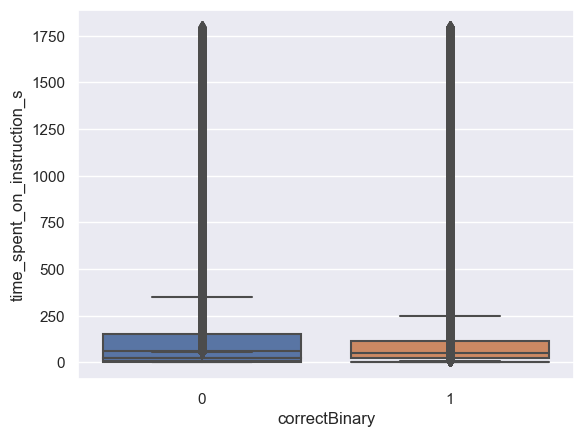

In [13]:
sns.boxplot(data=atoms_only,x='correctBinary',y='time_spent_answering_s')
sns.boxplot(data=atoms_only,x='correctBinary',y='time_spent_on_instruction_s')

<AxesSubplot:xlabel='difficulty', ylabel='Count'>

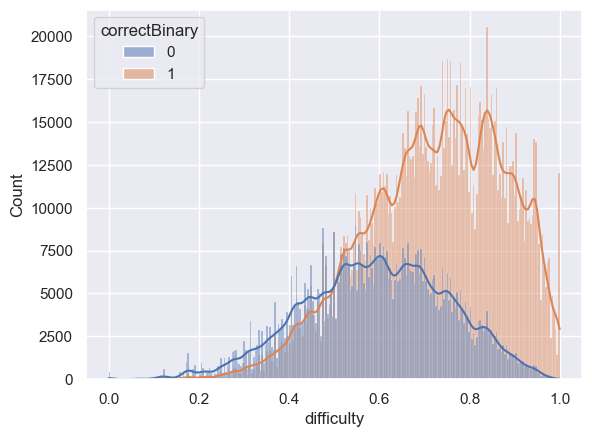

In [14]:
sns.histplot(data=atoms_only,hue='correctBinary',x='difficulty',kde=True)

In [15]:
df.correctBinary.value_counts()[1]

1708741

In [16]:
df.correctBinary.value_counts()[0]

796133

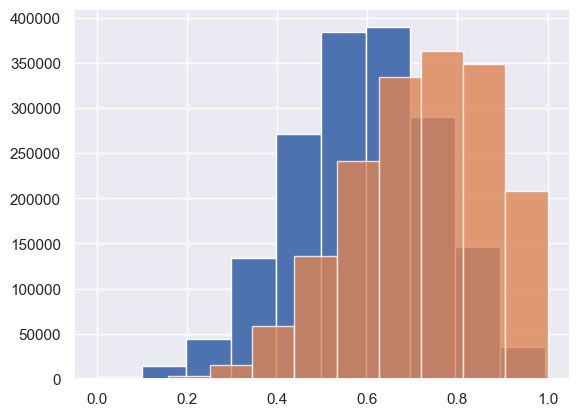

In [17]:
plt.hist(df[df.correctBinary==0].difficulty.sample(df.correctBinary.value_counts()[1],replace=True));
plt.hist(df[df.correctBinary==1].difficulty,alpha=.8);

In [18]:
atoms_only['attempt_count']=atoms_only.groupby(by=['goal_id','user_id','atom_id']).cumcount()+1
    

C:\Users\mpathirana\AppData\Local\Temp\ipykernel_25400\3629598067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atoms_only['attempt_count']=atoms_only.groupby(by=['goal_id','user_id','atom_id']).cumcount()+1


In [23]:
atoms_only['correctBinary_shifted']=atoms_only.groupby(['goal_id','user_id'])['correctBinary'].shift()

C:\Users\mpathirana\AppData\Local\Temp\ipykernel_25400\3687470555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atoms_only['correctBinary_shifted']=atoms_only.groupby(['goal_id','user_id'])['correctBinary'].shift()


<AxesSubplot:>

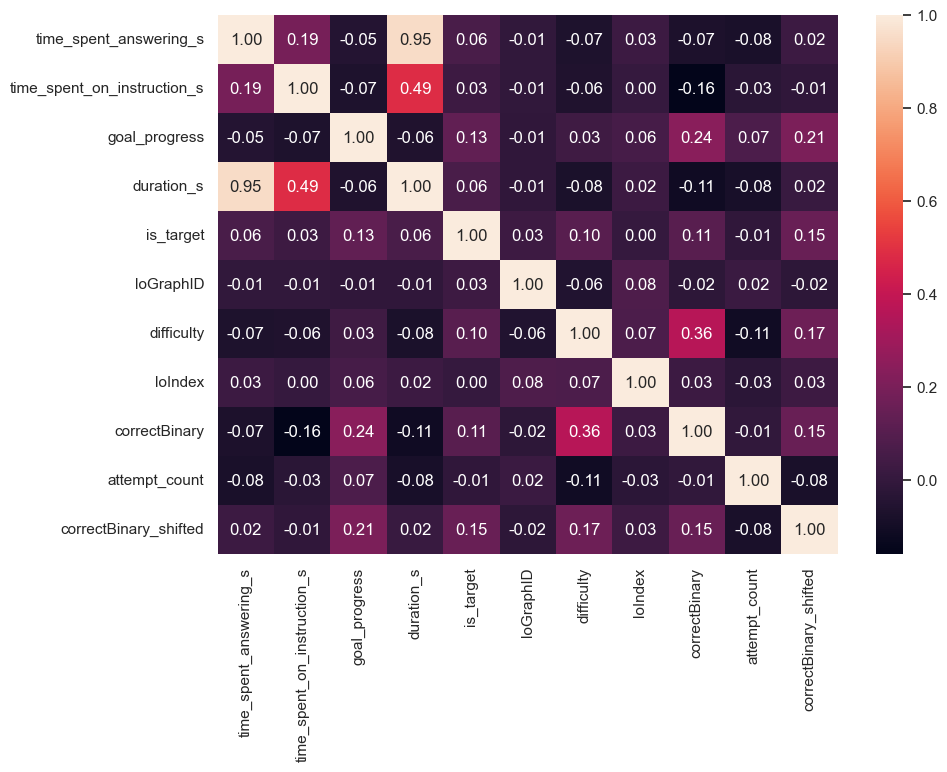

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(atoms_only.dropna().corr(),annot=True,fmt='.2f')

In [20]:
def user_dataset(df,df2,user,goal):
    
    '''
    df - df should be filtered by goal id
    
    edges
    -------
    lo -> atom
    atom -> atom
    lo -> learning materials (lm)
    atom -> lm
    lm -> atom
    lm -> lm
    
    node / features
    ---------------
    
    lo - radnom number
    atom - dificulty , number of attempt
    lm - time spend 
        
    '''    
    df=df[(df.loGraphID==goal) & (df.user_id==user )   ].reset_index(drop=True)
    userDf=df.sort_values(by='interaction_end_time')
    loIndex={lo:i for i,lo in enumerate( userDf.learning_objective_name.unique())}
    
    
    userDf['loIndex']=userDf['learning_objective_name'].apply(lambda x: loIndex[x])
    
    unique_lo=df2[(df2.source_lo_title.isin( df.learning_objective_name.unique())) | (df2.dest_lo_id.isin( df.learning_objective_name.unique()))]
    
    unique_lo['source_index']=unique_lo.source_lo_title.map(loIndex)
    unique_lo['dest_index']=unique_lo.dest_lo_title.map(loIndex)
    
    loEdgeMapping=unique_lo[['source_index','dest_index']].reset_index(drop=True)
    loEdgeMapping=loEdgeMapping.dropna(axis=0)
    loEdgeIndex=loEdgeMapping.values.transpose()
    
    #userDf=df[df.user_id==user]    
    
    
    atomIndex=np.arange(userDf[userDf.atom_type=='question'].atom_id.shape[0])
    lmIndex=np.arange(userDf[userDf.atom_type=='learningMaterial'].atom_id.shape[0])
    
    # assisgning questions and learningMaterials index seperatly in sinlge columns 'atom_index'
    userDf.loc[userDf.atom_type=='question','atomIndex']=atomIndex
    userDf.loc[userDf.atom_type=='learningMaterial','atomIndex']=lmIndex
    
    #lo-atom
    loAtomEdgeIndex=userDf[userDf.atom_type=='question'][['loIndex','atomIndex']].values.transpose()
    #lo-lm
    loLmEdgeIndex=userDf[userDf.atom_type=='learningMaterial'][['loIndex','atomIndex']].values.transpose()
    
    userDf['attempt_count']=userDf.groupby(by=['atom_id']).cumcount()+1
    
    userDf['atom_type_shift']=userDf.atom_type.shift(-1)
    userDf['atomIndex_shift']=userDf.atomIndex.shift(-1)
    
    #atom features
    atomFeatures = userDf[userDf.atom_type=='question'][['difficulty']].to_numpy()
    #learning materials features
    lmFeatures = userDf[userDf.atom_type=='learningMaterial'][['duration_s']].to_numpy()
    #learning objectives
    loFeatures=np.ones(userDf.loIndex.nunique()).reshape(-1,1)
    #target
    target=userDf[userDf.atom_type=='question']['correctBinary'].astype(int).to_numpy()
    
    userDf_shift= userDf[~userDf.atomIndex_shift.isna()].copy()  
    
    #atom-atom
    atomEdgeIndex=userDf_shift[(userDf_shift.atom_type=='question') & (userDf_shift.atom_type_shift=='question')][['atomIndex','atomIndex_shift']].values.transpose()
    #atom-lm
    atomLmEdgeIndex=userDf_shift[(userDf_shift.atom_type=='question') & (userDf_shift.atom_type_shift=='learningMaterial')][['atomIndex','atomIndex_shift']].values.transpose()
    #lm-atom
    LmAtomEdgeIndex=userDf_shift[(userDf_shift.atom_type=='learningMaterial') & (userDf_shift.atom_type_shift=='question')][['atomIndex','atomIndex_shift']].values.transpose()
    #lm-lm
    LmLmEdgeIndex=userDf_shift[(userDf_shift.atom_type=='learningMaterial') & (userDf_shift.atom_type_shift=='learningMaterial')][['atomIndex','atomIndex_shift']].values.transpose()
    featuresDict={'atom':atomFeatures,'lm':lmFeatures,'lo':loFeatures}
    edgesDict={'lo_atom':loAtomEdgeIndex,'lo_lm':loLmEdgeIndex,'lo':loEdgeIndex,'atom': atomEdgeIndex,'atom_lm':atomLmEdgeIndex,'lm_atom':LmAtomEdgeIndex,'lm_lm':LmLmEdgeIndex}
    
    return featuresDict,edgesDict,target,userDf_shift

In [31]:
user='0012ff2b-871a-45d6-8e33-804f7464fa0a'
features, edges,target,userDf_shift =user_dataset(df,df2,user,3 )

C:\Users\mpathirana\AppData\Local\Temp\ipykernel_25400\3146025405.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_lo['source_index']=unique_lo.source_lo_title.map(loIndex)
C:\Users\mpathirana\AppData\Local\Temp\ipykernel_25400\3146025405.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_lo['dest_index']=unique_lo.dest_lo_title.map(loIndex)


In [59]:
df.groupby('loGraphID')['user_id'].nunique()

loGraphID
0.0     4760
1.0       50
2.0      167
3.0      326
4.0       42
7.0       59
8.0       25
9.0       26
11.0      11
13.0     581
15.0      22
16.0    1428
18.0      12
19.0      82
22.0      22
23.0      28
24.0     111
25.0     358
26.0     274
29.0      26
30.0      23
35.0     160
37.0     323
Name: user_id, dtype: int64

In [93]:
dft=df[(df.loGraphID==26)  ]
userDf=dft.sort_values(by='interaction_end_time').reset_index(drop=True)

In [94]:
atom_count_per_user=userDf.groupby('user_id')['atom_id'].count()

In [97]:
atom_count_per_user[(atom_count_per_user>5) & (atom_count_per_user<500)].shape[0]/atom_count_per_user.shape[0]

0.8102189781021898

<AxesSubplot:>

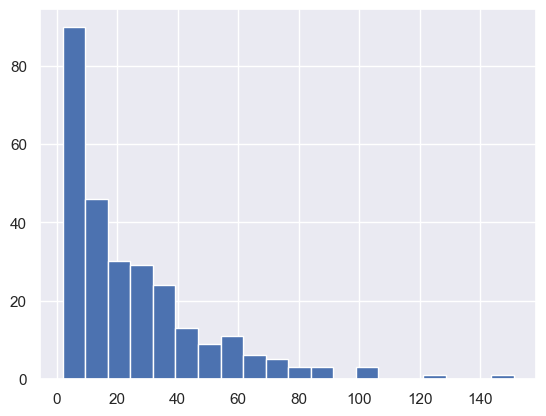

In [96]:
atom_count_per_user.hist(bins=20)

In [239]:
atomIndex={num:atomId for num,atomId in enumerate( userDf[userDf.atom_type=='question'].atom_id.to_list())}

In [240]:
userDf[userDf.atom_type=='question'].atom_id.shape

(293,)

In [241]:
len(userDf[userDf.atom_type=='question'].atom_id.to_list())

293

In [242]:
userDf_shift[(userDf_shift.atomIndex==12) | (userDf_shift.atomIndex==35)  ]

graph_id  \
15   076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
192  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
244  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
40   076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   

                                  user_id  \
15   0012ff2b-871a-45d6-8e33-804f7464fa0a   
192  0012ff2b-871a-45d6-8e33-804f7464fa0a   
244  0012ff2b-871a-45d6-8e33-804f7464fa0a   
40   0012ff2b-871a-45d6-8e33-804f7464fa0a   

                                  goal_id    interaction_end_time  \
15   04ae30cb-bf2f-4f17-b852-8c3902a66122 2022-09-01 12:46:36.681   
192  2b956cee-9456-4483-abee-fe354f546208 2022-09-18 19:15:04.021   
244  2b956cee-9456-4483-abee-fe354f546208 2022-09-18 20:08:16.061   
40   5b1889ca-a0ae-48ba-9076-fe94eca8bb21 2022-09-22 14:56:56.313   

                               learning_objective_name  \
15   Identify the piece of information needed to so...   
192          Identify and negate quantified statements   
244  Represent symbolic statements with parentheses...   
40   Convert a disjunction into an equivalent condi...   

                                  atom_id correct  time_spent_answering_s  \
15   6e7cb56f-343b-468b-8db8-7c112a16e38d    True              486.959015   
192  af31b1fb-8d0f-490f-98c0-5e0bc69ae9fe   False               32.015999   
244  a5786c0a-6e17-4344-a270-42c7ddfa7521    None                0.000000   
40   3824eebb-b28f-485e-b4f3-161e744e6e18    None                0.000000   

     time_spent_on_instruction_s  goal_progress  \
15                         4.865       0.250000   
192                        3.324       0.087556   
244                        9.421            NaN   
40                         0.000            NaN   

                            target_status_and_progress prev_concept_narrative  \
15   {'73789e26-a148-4618-9983-38b85adcffe9': {'pro...    DIRECT_ASSESS_TOPIC   
192  {'5310af35-3169-4538-a1c9-3a4933b680cd': {'pro...           DIRECT_TEACH   
244                                                NaN        DIRECT_PRE_TEST   
40                                                 NaN                    nan   

     duration_s  is_target  loGraphID  difficulty  loIndex         atom_type  \
15   491.824005       True        3.0    0.415493        2          question   
192   35.340000       True        3.0    0.495238        3          question   
244    9.421000       True        3.0         NaN        7  learningMaterial   
40     0.000000       True        3.0    0.589888       17  learningMaterial   

    correctBinary  atomIndex  attempt_count   atom_type_shift  atomIndex_shift  
15              1       12.0              1          question             13.0  
192             0       35.0              2          question             36.0  
244           NaN       12.0              1          question             81.0  
40            NaN       35.0              1  learningMaterial             36.0

In [205]:
df[(df.loGraphID==3) & (df.user_id==user)]

graph_id  \
0    076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
1    076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
2    076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
31   076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
32   076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
..                                    ...   
879  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
880  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
881  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
882  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
883  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   

                                  user_id  \
0    0012ff2b-871a-45d6-8e33-804f7464fa0a   
1    0012ff2b-871a-45d6-8e33-804f7464fa0a   
2    0012ff2b-871a-45d6-8e33-804f7464fa0a   
31   0012ff2b-871a-45d6-8e33-804f7464fa0a   
32   0012ff2b-871a-45d6-8e33-804f7464fa0a   
..                                    ...   
879  0012ff2b-871a-45d6-8e33-804f7464fa0a   
880  0012ff2b-871a-45d6-8e33-804f7464fa0a   
881  0012ff2b-871a-45d6-8e33-804f7464fa0a   
882  0012ff2b-871a-45d6-8e33-804f7464fa0a   
883  0012ff2b-871a-45d6-8e33-804f7464fa0a   

                                  goal_id    interaction_end_time  \
0    e359efc4-ed49-4227-a03e-c0c9358487d3 2022-10-02 16:17:07.342   
1    e359efc4-ed49-4227-a03e-c0c9358487d3 2022-10-02 16:17:42.073   
2    e359efc4-ed49-4227-a03e-c0c9358487d3 2022-10-02 16:17:42.341   
31   04ae30cb-bf2f-4f17-b852-8c3902a66122 2022-08-31 23:34:03.816   
32   04ae30cb-bf2f-4f17-b852-8c3902a66122 2022-08-31 23:34:31.613   
..                                    ...                     ...   
879  2b956cee-9456-4483-abee-fe354f546208 2022-09-18 23:17:22.533   
880  2b956cee-9456-4483-abee-fe354f546208 2022-09-18 23:17:35.363   
881  2b956cee-9456-4483-abee-fe354f546208 2022-09-18 23:19:07.633   
882  2b956cee-9456-4483-abee-fe354f546208 2022-09-18 23:22:16.744   
883  2b956cee-9456-4483-abee-fe354f546208 2022-09-18 23:22:16.952   

                               learning_objective_name  \
0    Construct a truth table for a conditional stat...   
1    Construct a truth table for a conditional stat...   
2    Construct a truth table for a conditional stat...   
31              Understand and use inductive reasoning   
32              Understand and use deductive reasoning   
..                                                 ...   
879  Determine if two symbolic statements are equiv...   
880  Determine if two symbolic statements are equiv...   
881  Construct a truth table for a biconditional st...   
882  Construct a truth table for a biconditional st...   
883  Construct a truth table for a biconditional st...   

                                  atom_id correct  time_spent_answering_s  \
0    90bf68ef-fa40-4c57-9054-c417a848d897   False              396.441010   
1    49287c70-b63d-41be-9acc-24fd1f273158    True               26.042000   
2    b2b1e778-26e0-4c99-ad3f-8ac5e8838a49    None                0.000000   
31   447fee45-3de2-497b-810c-4457b7cf4098    True              141.779007   
32   3d7d99ec-0253-4b18-8c24-2a8de2284b9b    True               25.722000   
..                                    ...     ...                     ...   
879  840862a4-6140-4b60-b9be-98e8e9312698    True               13.163000   
880  6d357a19-327f-463c-8819-442606b0addd   False               10.068000   
881  968c1b59-955e-4e0c-b056-663c3eda8221    True               89.484001   
882  3a0ec252-2b4e-4746-9b5a-aecf83572a1d    True              186.164001   
883  8c16f52e-2b10-41ca-8c62-b044b4361313    None                0.000000   

     time_spent_on_instruction_s  goal_progress  \
0                      24.492001       0.037663   
1                       8.122000       0.533186   
2                       0.000000            NaN   
31                      2.771000       0.020833   
32                      1.848000       0.041667   
..                           ...            ...   
879                     1.394000       0.576871   
880                     2.541000       0.573515   
881                     2.565000       0.

In [244]:
G=nx.DiGraph()
graphId=3
lo_count=int(max(edges['lo_atom'][0].max(),edges['lo_lm'][0].max(),edges['lo'].max())+1)
atom_count=int(max(edges['lo_atom'][1].max(),edges['atom'].max(),edges['atom_lm'][0].max(),edges['lm_atom'][1].max())+1)
lm_count=int(max(edges['lo_lm'][1].max(),edges['atom_lm'][1].max(),edges['lm_lm'].max())+1)

for i in range(lo_count):
    G.add_node('lo_{}'.format(i),color='blue',node_type='lo')
    
for i in range(atom_count):
    G.add_node('atom_{}'.format(i),color='orange',node_type='atom')

for i in range(lm_count):
    G.add_node('lm_{}'.format(i),color='green',node_type='atom')
    
for i in list(zip(edges['lo_atom'][0],edges['lo_atom'][1])):
    G.add_edge('lo_{}'.format(int(i[0])),'atom_{}'.format(int(i[1])))
    
for i in list(zip(edges['lo_lm'][0],edges['lo_lm'][1])):
    G.add_edge('lo_{}'.format(int(i[0])),'lm_{}'.format(int(i[1])))

for i in  list(zip(edges['lo'][0],edges['lo'][1])):
    G.add_edge('lo_{}'.format(int(i[0])),'lo_{}'.format(int(i[1])))
    
for i in list(zip(edges['atom'][0],edges['atom'][1])):
    G.add_edge('atom_{}'.format(int(i[0])),'atom_{}'.format(int(i[1])))

for i in list(zip(edges['atom_lm'][0],edges['atom_lm'][1])):
    G.add_edge('atom_{}'.format(int(i[0])),'lm_{}'.format(int(i[1])))

for i in list(zip(edges['lm_atom'][0],edges['lm_atom'][1])):
    G.add_edge('lm_{}'.format(int(i[0])),'atom_{}'.format(int(i[1])))

for i in list(zip(edges['lm_lm'][0],edges['lm_lm'][1])):
    G.add_edge('lm_{}'.format(int(i[0])),'lm_{}'.format(int(i[1])))

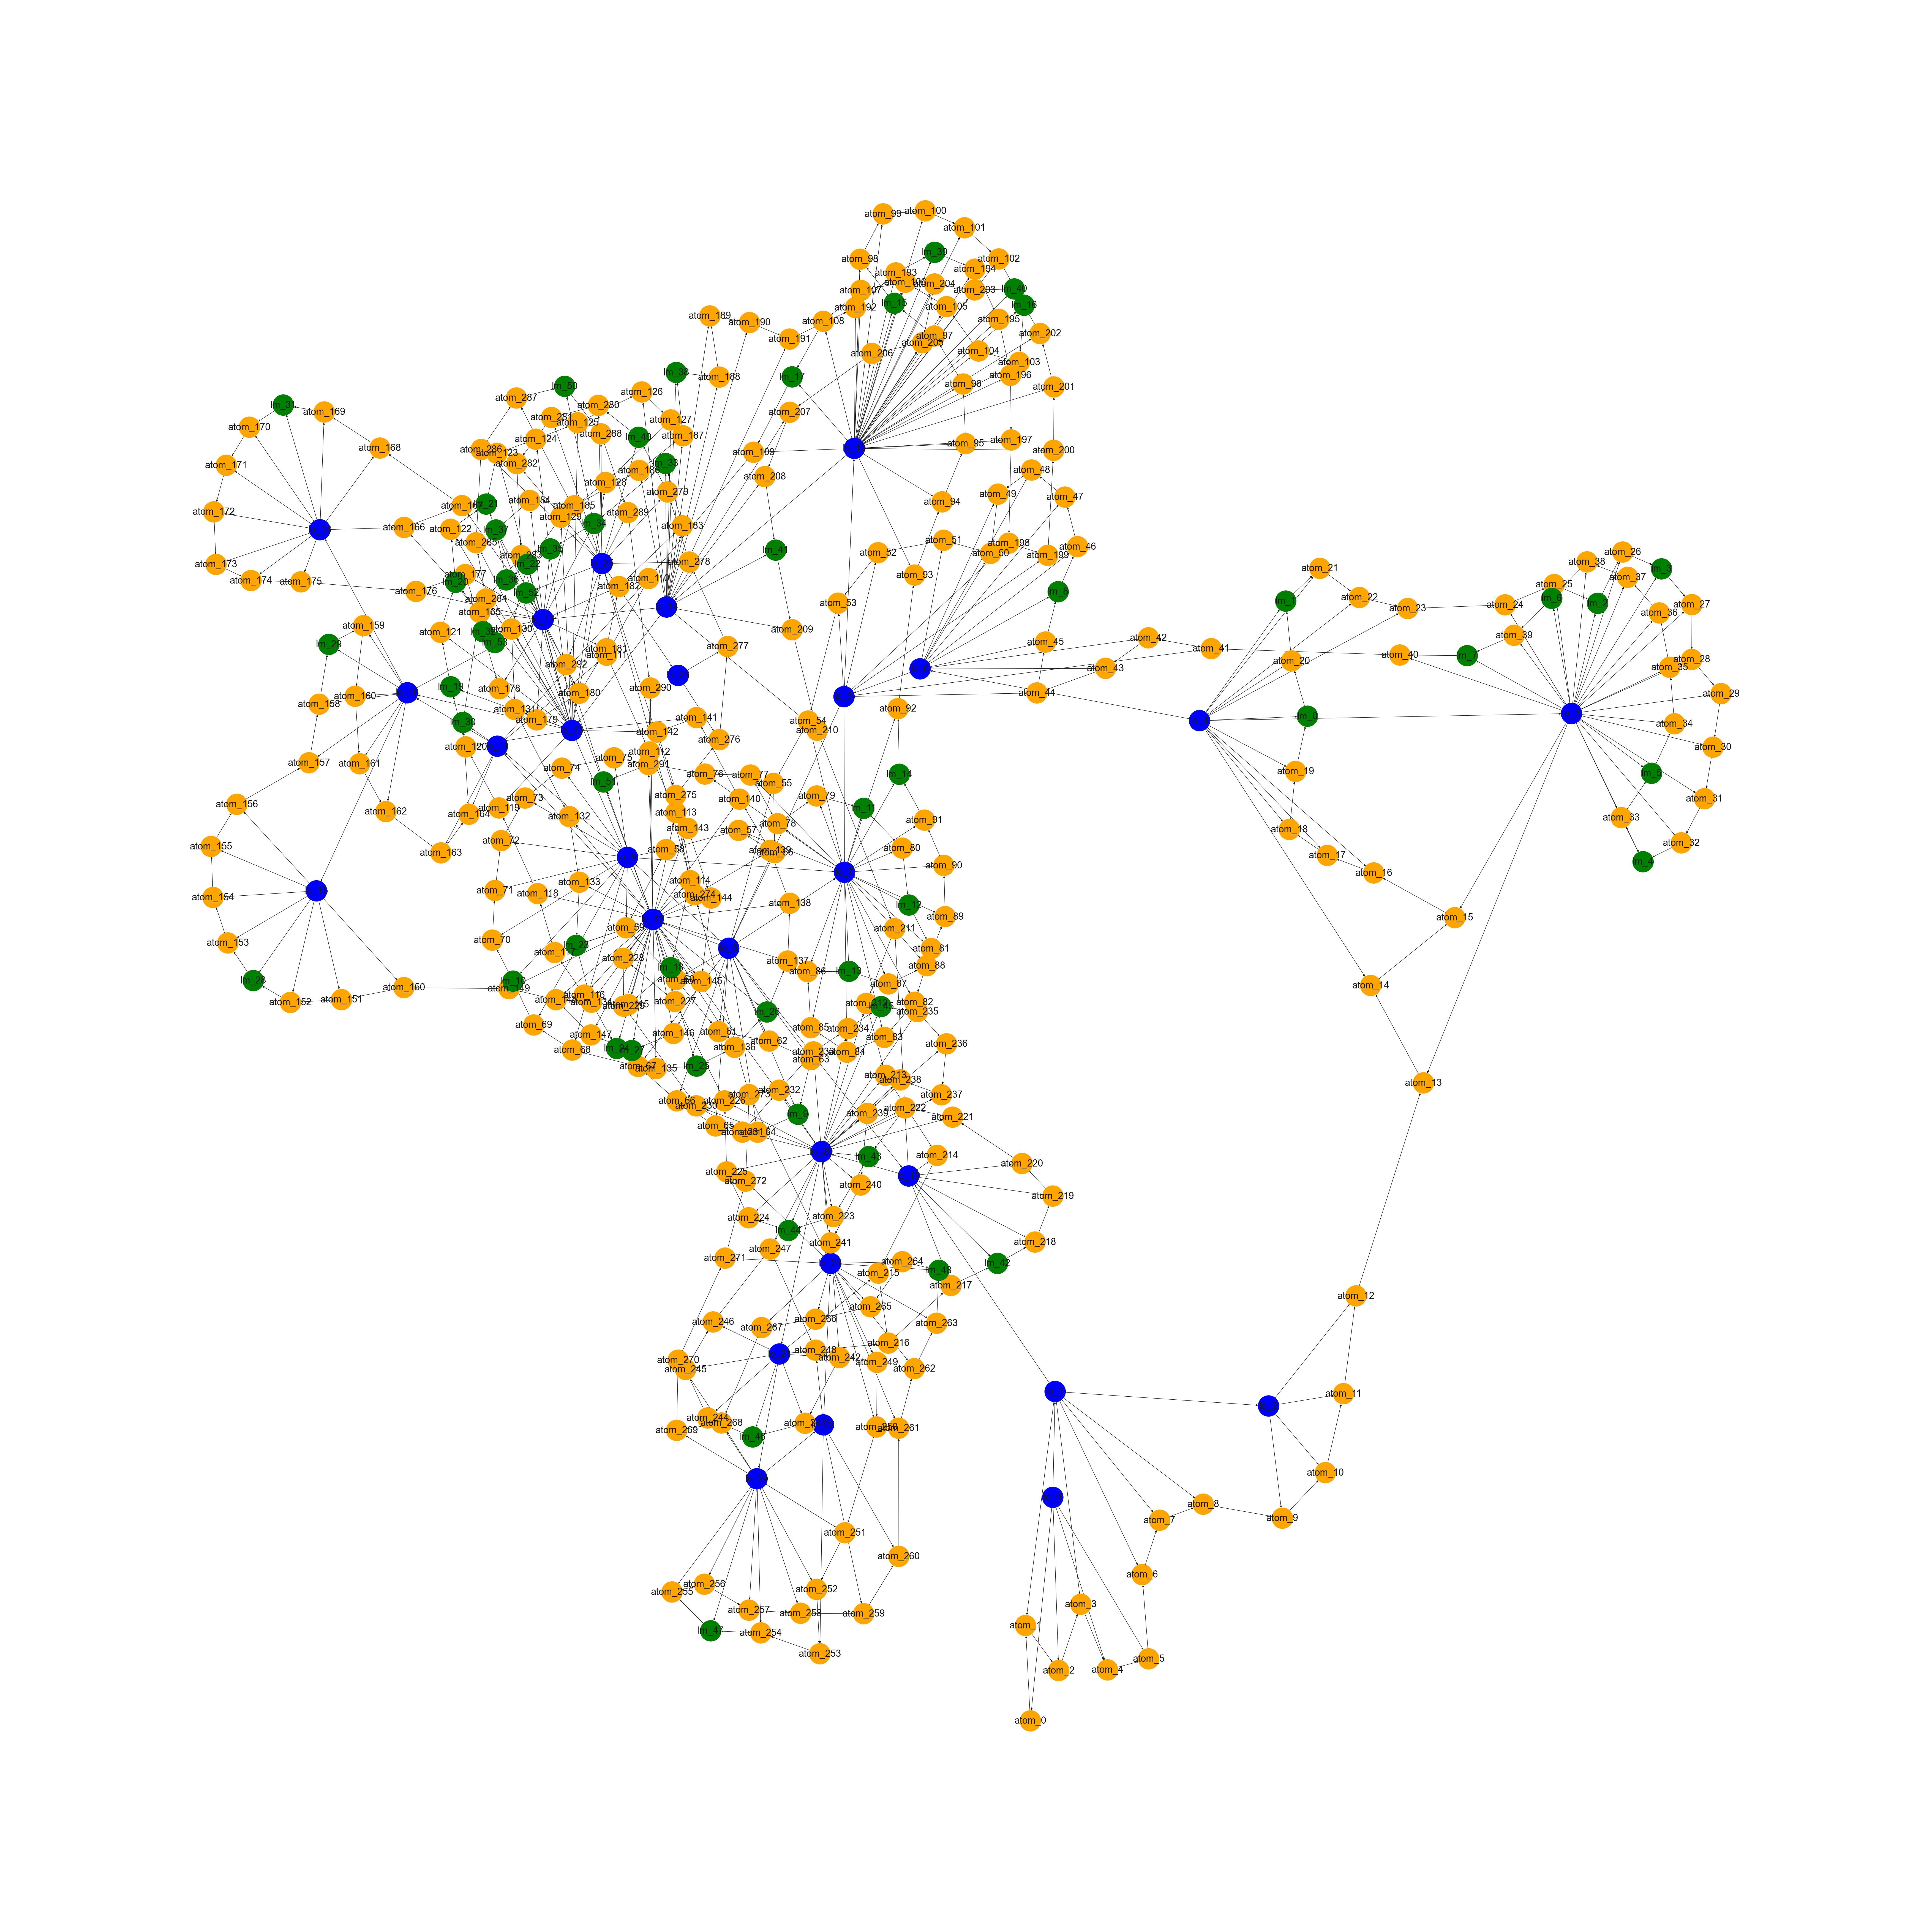

In [245]:
pos = nx.kamada_kawai_layout(G)

colors =  [node[1].get('color') for node in G.nodes(data=True)]
fig = plt.figure(1, figsize=(70, 70), dpi=100) #30,20

nx.draw(G,pos,with_labels=True,font_size=25,node_color=colors,node_size=3000) #10
ax = plt.gca()
ax.margins(0.08)
   

In [100]:
# lo - blue 
# atom - orange 
# lm - green 

In [80]:
lo_atom=edges['lo_atom']

In [87]:
lo_atom_edges=list(zip(lo_atom[0],lo_atom[1]))

In [88]:
G.add_edges_from(lo_atom_edges)

In [99]:
G.add_nodes_from?

Signature: G.add_nodes_from(nodes_for_adding, **attr)
Docstring:
Add multiple nodes.

Parameters
----------
nodes_for_adding : iterable container
    A container of nodes (list, dict, set, etc.).
    OR
    A container of (node, attribute dict) tuples.
    Node attributes are updated using the attribute dict.
attr : keyword arguments, optional (default= no attributes)
    Update attributes for all nodes in nodes.
    Node attributes specified in nodes as a tuple take
    precedence over attributes specified via keyword arguments.

See Also
--------
add_node

Examples
--------
>>> G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
>>> G.add_nodes_from("Hello")
>>> K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
>>> G.add_nodes_from(K3)
>>> sorted(G.nodes(), key=str)
[0, 1, 2, 'H', 'e', 'l', 'o']

Use keywords to update specific node attributes for every node.

>>> G.add_nodes_from([1, 2], size=10)
>>> G.add_nodes_from([3, 4], weight=0.4)

Use (node, attrdict) tuples to update attribute